<a href="https://colab.research.google.com/github/opark03/Notebooks/blob/main/notebooks/08-pandas-introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

The data manipulation package of choice for Python users is Pandas. Pandas is built on top of NumPy and provides an efficient implementation of a DataFrame. DataFrames are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data. As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs.

Let's work through a sample data frame using the Pandas library. We'll start by importing the library and creating a data frame from the Titanic Passenger List.

These great examples are adapted from Giles McMullen-Klein's work.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
titanic_df = pd.read_excel('titanic3.xls', 'titanic3', index_col=None, na_values=['NA'])

In [4]:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


new colum on the left is pandas index (not in orginial spreadsheet)

In [5]:
titanic_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


does statistical anaylsis for different variables

In [6]:
titanic_df.drop(['ticket','cabin','boat','body'],axis=1).head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"


deleting from collab and memory but not to excel sheet

In [7]:
titanic_df.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True


true means yes null

In [8]:
titanic_df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

determines where the most data is missing- also gives data type for calcuation

<Axes: >

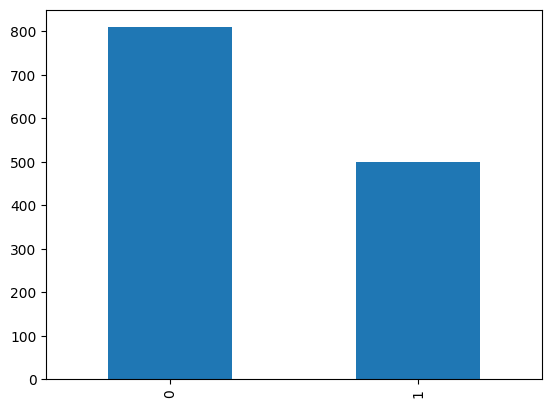

In [9]:
pd.value_counts(titanic_df['survived']).plot.bar()

creates a bar chart on who survied

In [10]:
titanic_df['survived'].mean()

0.3819709702062643

In [11]:
titanic_df.groupby(['sex','pclass'])['survived'].mean()

sex     pclass
female  1         0.965278
        2         0.886792
        3         0.490741
male    1         0.340782
        2         0.146199
        3         0.152130
Name: survived, dtype: float64

gives the average rate of survival based on sex and pclass

In [12]:
titanic_df['sex'].count()

1309

gives the total number of one entry

In [13]:
titanic_df[titanic_df['age']<18]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
53,1,0,"Carrau, Mr. Jose Pedro",male,17.0000,0,0,113059,47.1000,NaN,S,NaN,NaN,"Montevideo, Uruguay"
54,1,1,"Carter, Master. William Thornton II",male,11.0000,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA"
55,1,1,"Carter, Miss. Lucile Polk",female,14.0000,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,3,0,"Van Impe, Miss. Catharina",female,10.0000,0,2,345773,24.1500,NaN,S,NaN,NaN,NaN
1275,3,0,"Vander Planke, Mr. Leo Edmondus",male,16.0000,2,0,345764,18.0000,NaN,S,NaN,NaN,NaN
1279,3,0,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0000,0,0,350406,7.8542,NaN,S,NaN,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0000,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN


sorts data based on a new frame

## Time-Series Data

Use pandas to look at stock values over time from a remote API.

In [14]:
zzzfPMjA7GsZUuyUpK7n_n7zzz

NameError: ignored

In [15]:
!pip install quandl
import quandl
quandl.ApiConfig.api_key = ''
google = quandl.get('WIKI/GOOGL')
fb = quandl.get('WIKI/FB')

In [16]:
%matplotlib inline
google.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


<Axes: xlabel='Date'>

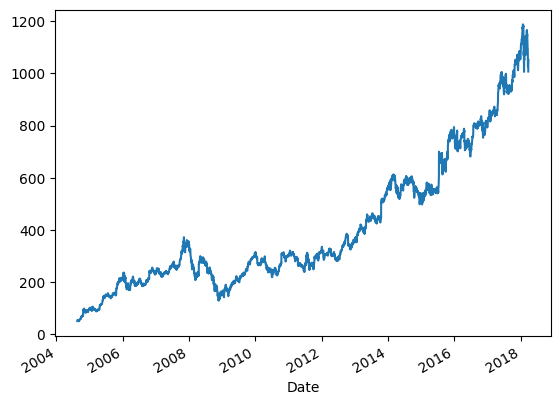

In [17]:
google['Adj. Close'].plot()

In [18]:
fb.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0
2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0
2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0
2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0
2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0


<Axes: xlabel='Date'>

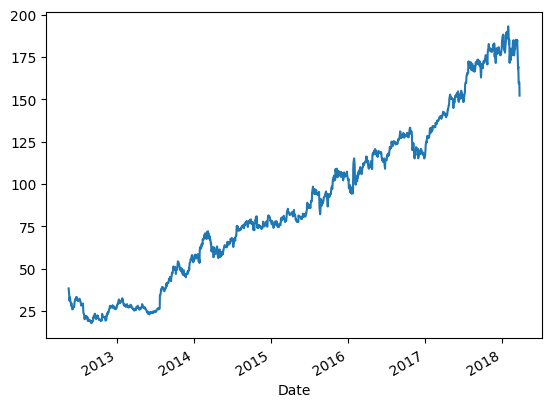

In [19]:
fb['Adj. Close'].plot()

<Axes: xlabel='Date'>

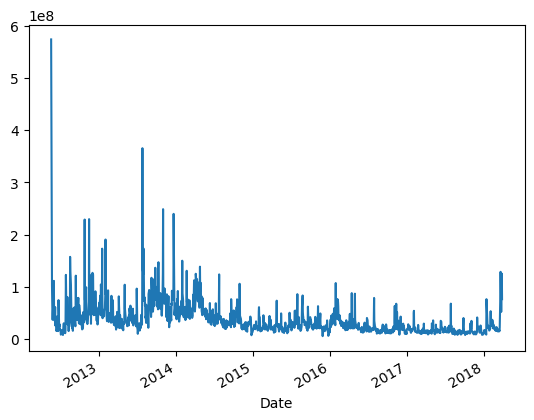

In [20]:
fb['Volume'].plot()

In [21]:
google.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=3424, freq=None)

<ipython-input-22-cb612582414a>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  google['2004']['Adj. Close'].plot()


<Axes: xlabel='Date'>

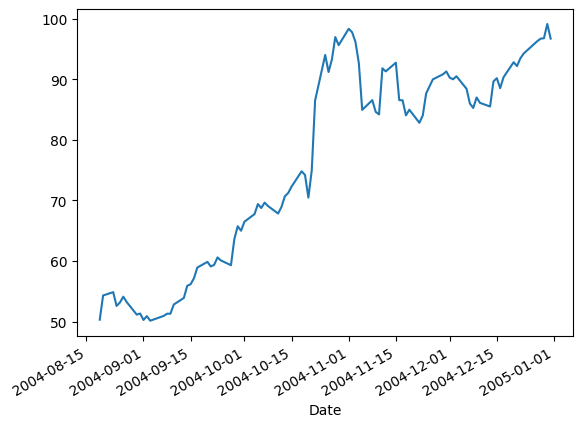

In [22]:
google['2004']['Adj. Close'].plot()